In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_indicators

In [30]:
data = pd.read_parquet('data/Deepseek/DEEPSEEK_5_tables_final.parquet', engine='pyarrow')
data.columns

Index(['Text_EN', 'Text_PL', 'Text_RU', 'Translation_quality',
       'Deepseek_far_right_EN_answer', 'Deepseek_far_right_PL_answer',
       'Deepseek_far_right_RU_answer', 'Deepseek_mod_cons_EN_answer',
       'Deepseek_mod_cons_PL_answer', 'Deepseek_mod_cons_RU_answer',
       'Deepseek_prog_left_EN_answer', 'Deepseek_prog_left_PL_answer',
       'Deepseek_prog_left_RU_answer', 'Deepseek_centrist_EN_answer',
       'Deepseek_centrist_PL_answer', 'Deepseek_centrist_RU_answer'],
      dtype='object')

In [31]:
data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [3,4,5]].dropna()
far_right = list()
mod_cons = list()
prog_left = list()
centr = list()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
for i in range(len(df_binary)):
    if sum(df_binary.iloc[i, :]) != 3 and sum(df_binary.iloc[i, :]) != 0:
        far_right.append(i)

data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [6,7,8]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
for i in range(len(df_binary)):
    if sum(df_binary.iloc[i, :]) != 3 and sum(df_binary.iloc[i, :]) != 0:
        mod_cons.append(i)

data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [9, 10, 11]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
for i in range(len(df_binary)):
    if sum(df_binary.iloc[i, :]) != 3 and sum(df_binary.iloc[i, :]) != 0:
        prog_left.append(i)

data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [12, 13, 14]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
for i in range(len(df_binary)):
    if sum(df_binary.iloc[i, :]) != 3 and sum(df_binary.iloc[i, :]) != 0:
        centr.append(i)

Number of rows: 236
Number of rows: 243
Number of rows: 199
Number of rows: 257


In [32]:
data.iloc[113, ]

Text_EN                         Amen ! <user> <user> it should be it. Popular ...
Text_PL                         Amen! <user> <user> to powinno być to. Głosowa...
Text_RU                         Аминь! <user> <user> так и должно быть. Народн...
Translation_quality                                                           1.0
Deepseek_far_right_EN_answer                                                  1.0
Deepseek_far_right_PL_answer                                                  0.0
Deepseek_far_right_RU_answer                                                  0.0
Deepseek_mod_cons_EN_answer                                                   1.0
Deepseek_mod_cons_PL_answer                                                   1.0
Deepseek_mod_cons_RU_answer                                                   1.0
Deepseek_prog_left_EN_answer                                                  0.0
Deepseek_prog_left_PL_answer                                                  0.0
Deepseek_prog_le

# DeepSeek-R1

Number of rows: 252


/home/pihul/Desktop/Projects/Magisterka/.venv/lib64/python3.13/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/pihul/Desktop/Projects/Magisterka/.venv/lib64/python3.13/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obj

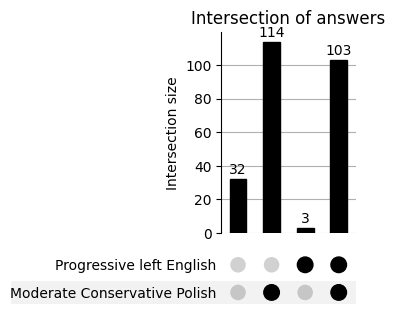

In [34]:
data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [7, 9]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['Moderate Conservative Polish', 'Progressive left English']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Intersection of answers"
if_save = 1
save_path = "data/Upset/upsetplot_mod_cons_pl_prog_left_en.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
    sort_categories_by="input",
    with_lines=False,
    include_empty_subsets=True,
    totals_plot_elements=0,
    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();

In [ ]:
data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [3,4,5]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Far-right"
if_save = 1
save_path = "data/Upset/upsetplot_far_right.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
    sort_categories_by="input",
    with_lines=False,
    include_empty_subsets=True,
    totals_plot_elements=0,
    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();


In [ ]:
data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [6, 7, 8]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Moderate conservative"
if_save = 1
save_path = "data/Upset/upsetplot_mod_cons.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
        sort_categories_by="input",

    with_lines=False,
    include_empty_subsets=True,
        totals_plot_elements=0,

    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();


In [ ]:
data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [9, 10, 11]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Progressive left"
if_save = 1
save_path = "data/Upset/upsetplot_prog_left.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
        sort_categories_by="input",

    with_lines=False,
    include_empty_subsets=True,
        totals_plot_elements=0,

    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();


In [ ]:
data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [12, 13, 14]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Centrist"
if_save = 1
save_path = "data/Upset/upsetplot_centr.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
        sort_categories_by="input",

    with_lines=False,
    include_empty_subsets=True,
        totals_plot_elements=0,

    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();


# DeepSeek-V3

In [ ]:
data = pd.read_parquet('data/Deepseek_v3/data.parquet', engine='pyarrow')
data.info()

In [ ]:
data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [3,4,5]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Far-right"
if_save = 1
save_path = "data/Upset/deepseek_v3_far_right.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
    sort_categories_by="input",
    with_lines=False,
    include_empty_subsets=True,
    totals_plot_elements=0,
    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();


In [ ]:
data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [6, 7, 8]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Moderate conservative"
if_save = 1
save_path = "data/Upset/deepseek_v3_mod_cons.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
        sort_categories_by="input",

    with_lines=False,
    include_empty_subsets=True,
        totals_plot_elements=0,

    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();


In [ ]:
data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [9, 10, 11]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Progressive left"
if_save = 1
save_path = "data/Upset/deepseek_v3_prog_left.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
        sort_categories_by="input",

    with_lines=False,
    include_empty_subsets=True,
        totals_plot_elements=0,

    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();


In [ ]:
data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [12, 13, 14]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Centrist"
if_save = 1
save_path = "data/Upset/deepseek_v3_centr.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
        sort_categories_by="input",

    with_lines=False,
    include_empty_subsets=True,
        totals_plot_elements=0,

    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();

# Gemma

In [ ]:
data = pd.read_parquet('data/Gemma/temp_0/data_gemma_complete.parquet', engine='pyarrow')
data.info()

In [ ]:
data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [3,4,5]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Far-right"
if_save = 1
save_path = "data/Upset/gemma_far_right.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
    sort_categories_by="input",
    with_lines=False,
    include_empty_subsets=True,
    totals_plot_elements=0,
    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();

In [ ]:
data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [6, 7, 8]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Moderate conservative"
if_save = 1
save_path = "data/Upset/gemma_mod_cons.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
        sort_categories_by="input",

    with_lines=False,
    include_empty_subsets=True,
        totals_plot_elements=0,

    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();


In [ ]:
data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [9, 10, 11]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Progressive left"
if_save = 1
save_path = "data/Upset/gemma_prog_left.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
        sort_categories_by="input",

    with_lines=False,
    include_empty_subsets=True,
        totals_plot_elements=0,

    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();

In [ ]:
data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [12, 13, 14]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Centrist"
if_save = 1
save_path = "data/Upset/gemma_centr.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
        sort_categories_by="input",

    with_lines=False,
    include_empty_subsets=True,
        totals_plot_elements=0,

    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();

# GPT-4.1-mini

In [ ]:
data = pd.read_parquet('data/Openai_41_mini/data.parquet', engine='pyarrow')
data.info()

In [ ]:
data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [3,4,5]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Far-right"
if_save = 1
save_path = "data/Upset/openai_41_mini_far_right.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
    sort_categories_by="input",
    with_lines=False,
    include_empty_subsets=True,
    totals_plot_elements=0,
    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();

data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [6, 7, 8]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Moderate conservative"
if_save = 1
save_path = "data/Upset/openai_41_mini_mod_cons.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
        sort_categories_by="input",

    with_lines=False,
    include_empty_subsets=True,
        totals_plot_elements=0,

    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();


data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [9, 10, 11]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Progressive left"
if_save = 1
save_path = "data/Upset/openai_41_mini_prog_left.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
        sort_categories_by="input",

    with_lines=False,
    include_empty_subsets=True,
        totals_plot_elements=0,

    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();


data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [12, 13, 14]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Centrist"
if_save = 1
save_path = "data/Upset/openai_41_mini_centr.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
        sort_categories_by="input",

    with_lines=False,
    include_empty_subsets=True,
        totals_plot_elements=0,

    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();

# Mistral

In [ ]:
data = pd.read_parquet('data/Mistral/temp_0/data_mistral_complete.parquet', engine='pyarrow')
data.info()

In [ ]:
data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [3,4,5]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)

plot_file_name = "mistral"

plot_name = "Far-right"
if_save = 1
save_path = f"data/Upset/{plot_file_name}_far_right.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
    sort_categories_by="input",
    with_lines=False,
    include_empty_subsets=True,
    totals_plot_elements=0,
    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();

data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [6, 7, 8]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Moderate conservative"
if_save = 1
save_path = f"data/Upset/{plot_file_name}_mod_cons.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
        sort_categories_by="input",

    with_lines=False,
    include_empty_subsets=True,
        totals_plot_elements=0,

    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();


data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [9, 10, 11]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Progressive left"
if_save = 1
save_path = f"data/Upset/{plot_file_name}_prog_left.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
        sort_categories_by="input",

    with_lines=False,
    include_empty_subsets=True,
        totals_plot_elements=0,

    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();


data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [12, 13, 14]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Centrist"
if_save = 1
save_path = f"data/Upset/{plot_file_name}_centr.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
        sort_categories_by="input",

    with_lines=False,
    include_empty_subsets=True,
        totals_plot_elements=0,

    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();

# o4-mini

In [ ]:
data = pd.read_parquet('data/Openai/OPENAI_5_tables_final.parquet', engine='pyarrow')
data.info()

In [ ]:
data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [3,4,5]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)

plot_file_name = "openai_o4_mini"

plot_name = "Far-right"
if_save = 1
save_path = f"data/Upset/{plot_file_name}_far_right.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
    sort_categories_by="input",
    with_lines=False,
    include_empty_subsets=True,
    totals_plot_elements=0,
    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();

data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [6, 7, 8]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Moderate conservative"
if_save = 1
save_path = f"data/Upset/{plot_file_name}_mod_cons.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
        sort_categories_by="input",

    with_lines=False,
    include_empty_subsets=True,
        totals_plot_elements=0,

    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();


data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [9, 10, 11]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Progressive left"
if_save = 1
save_path = f"data/Upset/{plot_file_name}_prog_left.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
        sort_categories_by="input",

    with_lines=False,
    include_empty_subsets=True,
        totals_plot_elements=0,

    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();


data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [12, 13, 14]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Centrist"
if_save = 1
save_path = f"data/Upset/{plot_file_name}_centr.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
        sort_categories_by="input",

    with_lines=False,
    include_empty_subsets=True,
        totals_plot_elements=0,

    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();

# Qwen3-4B

In [ ]:
data = pd.read_parquet('data/Qwen/temp_0/data_qwen_complete.parquet', engine='pyarrow')
data.info()

In [ ]:
data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [3,4,5]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)

plot_file_name = "qwen3_4b"

plot_name = "Far-right"
if_save = 1
save_path = f"data/Upset/{plot_file_name}_far_right.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
    sort_categories_by="input",
    with_lines=False,
    include_empty_subsets=True,
    totals_plot_elements=0,
    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();

data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [6, 7, 8]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Moderate conservative"
if_save = 1
save_path = f"data/Upset/{plot_file_name}_mod_cons.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
        sort_categories_by="input",

    with_lines=False,
    include_empty_subsets=True,
        totals_plot_elements=0,

    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();


data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [9, 10, 11]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Progressive left"
if_save = 1
save_path = f"data/Upset/{plot_file_name}_prog_left.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
        sort_categories_by="input",

    with_lines=False,
    include_empty_subsets=True,
        totals_plot_elements=0,

    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();


data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [12, 13, 14]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Centrist"
if_save = 1
save_path = f"data/Upset/{plot_file_name}_centr.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
        sort_categories_by="input",

    with_lines=False,
    include_empty_subsets=True,
        totals_plot_elements=0,

    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();

# Qwen3-8B

In [ ]:
data = pd.read_csv('data/Qwen_reasoning/data.csv')
data.info()

In [ ]:
data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [3,4,5]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)

plot_file_name = "qwen3_8b"

plot_name = "Far-right"
if_save = 1
save_path = f"data/Upset/{plot_file_name}_far_right.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
    sort_categories_by="input",
    with_lines=False,
    include_empty_subsets=True,
    totals_plot_elements=0,
    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();

data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [6, 7, 8]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Moderate conservative"
if_save = 1
save_path = f"data/Upset/{plot_file_name}_mod_cons.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
        sort_categories_by="input",

    with_lines=False,
    include_empty_subsets=True,
        totals_plot_elements=0,

    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();


data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [9, 10, 11]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Progressive left"
if_save = 1
save_path = f"data/Upset/{plot_file_name}_prog_left.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
        sort_categories_by="input",

    with_lines=False,
    include_empty_subsets=True,
        totals_plot_elements=0,

    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();


data_for_plot = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1).iloc[:, [12, 13, 14]].dropna()
print(f'Number of rows: {data_for_plot.shape[0]}')
df_binary = data_for_plot[data_for_plot.columns.to_list()] == 1.0
df_binary.columns = ['English', 'Polish', 'Russian']
upset_data = from_indicators(df_binary.columns, df_binary)


plot_name = "Centrist"
if_save = 1
save_path = f"data/Upset/{plot_file_name}_centr.pdf"




fig, axes = plt.subplots(1, 1, figsize=(25, 10))
axes.set_axis_off()
UpSet(
    upset_data, 
    show_counts=True,
    show_percentages=False,
    sort_by='degree',
        sort_categories_by="input",

    with_lines=False,
    include_empty_subsets=True,
        totals_plot_elements=0,

    ).plot(fig=fig)
plt.title(plot_name)



if if_save:
    plt.savefig(save_path, dpi=300, bbox_inches='tight', format="pdf")
plt.show();